In [1]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 14.70 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [ ]:
%cd /content/keras-retinanet/
!pip install .

In [ ]:
!python setup.py build_ext --inplace

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import requests
import numpy as np
import urllib
import os
from PIL import Image

# from tensorflow.keras.layers import Dense, Flatten, Input , Layer, Reshape
# from tensorflow.keras.models import Model
# import tensorflow_datasets as tfds
# from tensorflow.keras.datasets import cifar10

from keras_retinanet import models
from keras_retinanet.utils.image import  preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

%matplotlib inline

In [11]:
urllib.request.urlretrieve(
    'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5',
    'pretrained_model.h5')

('pretrained_model.h5', <http.client.HTTPMessage at 0x7f486174be50>)

In [12]:
model = models.load_model('pretrained_model.h5')

In [13]:
model.summary()

Model: "retinanet-bbox"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
_____________________________________________________________________________________

# New Section

In [14]:
!wget https://lazyprogrammer.me/course_files/obj_detection/coco_categories.txt

--2021-04-26 11:29:50--  https://lazyprogrammer.me/course_files/obj_detection/coco_categories.txt
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘coco_categories.txt’

coco_categories.txt     [ <=>                ]     621  --.-KB/s    in 0s      

2021-04-26 11:29:50 (10.7 MB/s) - ‘coco_categories.txt’ saved [621]



In [ ]:
class_names = [l.rstrip() for l in open('coco_categories.txt')]
class_names

In [16]:
# fn that take image path that will plot the image and also draw the bounding boxes from the models
def show_image_with_predictions(image_path, threshold=0.6):
  im= np.array(Image.open(image_path))
  print('image.shape:', im.shape)

  im = im[:,:,:3]
  #get prediction
  imp = preprocess_image(im)
  imp, scale = resize_image(im)

  boxes, scores, labels = model.predict_on_batch(
      np.expand_dims(imp, axis=0)
  )
  # Standardize box coordinates
  boxes /= scale

  for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < threshold:
      break
    box = box.astype(np.int32)
    color = label_color(label)
    draw_box(im, box, color=color)

    class_name = class_names[label]
    caption = f"{class_name} {score:.3f}"
    draw_caption(im, box, caption)

  plt.axis('off')
  plt.imshow(im)
  plt.show()
  

--2021-04-26 11:44:12--  https://lazyprogrammer.me/course_files/obj_detection/baseball.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162736 (159K) [image/jpeg]
Saving to: ‘baseball.jpg’

baseball.jpg        100%[===================>] 158.92K   545KB/s    in 0.3s    

2021-04-26 11:44:13 (545 KB/s) - ‘baseball.jpg’ saved [162736/162736]

image.shape: (430, 638, 3)


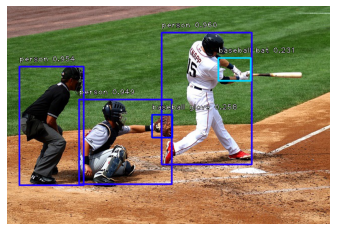

In [17]:
!wget https://lazyprogrammer.me/course_files/obj_detection/baseball.jpg
show_image_with_predictions('baseball.jpg', threshold=0.2)

In [18]:
plt.rcParams['figure.figsize'] = [20, 10]

--2021-04-26 11:45:53--  https://lazyprogrammer.me/course_files/obj_detection/cars.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220485 (215K) [image/jpeg]
Saving to: ‘cars.jpg’

cars.jpg            100%[===================>] 215.32K   692KB/s    in 0.3s    

2021-04-26 11:45:54 (692 KB/s) - ‘cars.jpg’ saved [220485/220485]

image.shape: (666, 1000, 3)


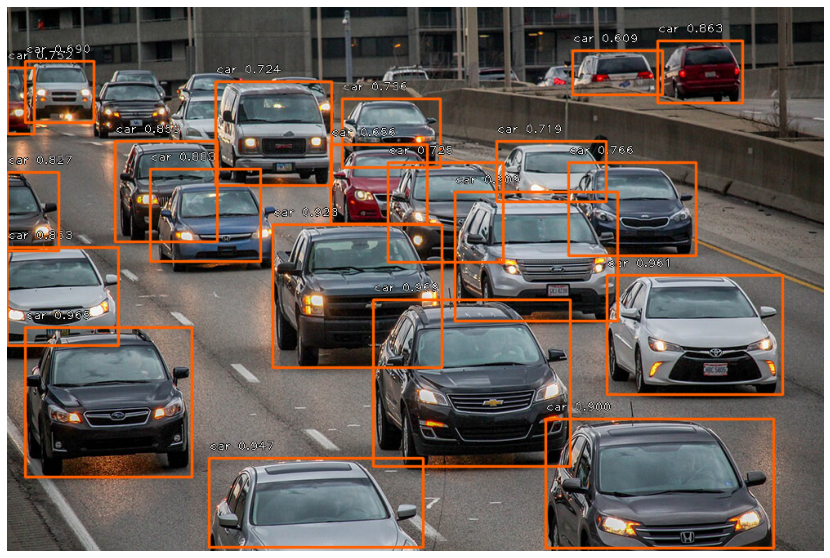

In [19]:
!wget https://lazyprogrammer.me/course_files/obj_detection/cars.jpg
show_image_with_predictions('cars.jpg')

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


--2021-04-26 11:50:50--  https://lazyprogrammer.me/course_files/obj_detection/crosswalk.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53698 (52K) [image/jpeg]
Saving to: ‘crosswalk.jpg’

crosswalk.jpg       100%[===================>]  52.44K  --.-KB/s    in 0.03s   

2021-04-26 11:50:51 (1.55 MB/s) - ‘crosswalk.jpg’ saved [53698/53698]

image.shape: (384, 512, 3)


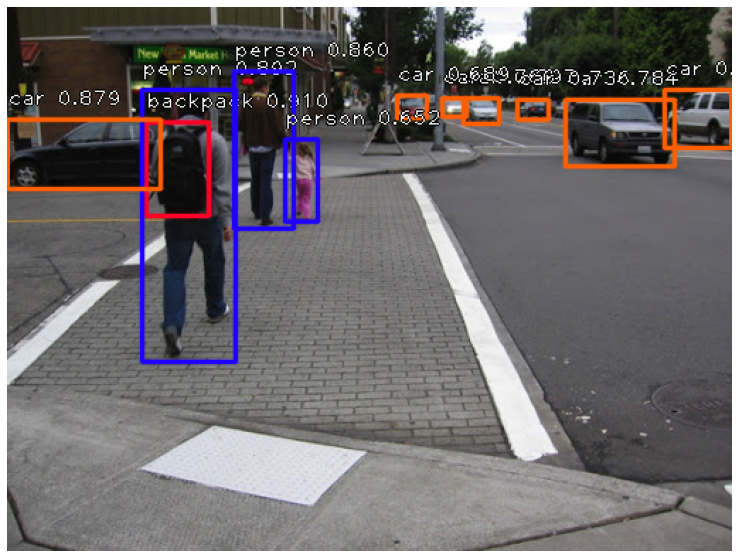

In [21]:
!wget https://lazyprogrammer.me/course_files/obj_detection/crosswalk.jpg
show_image_with_predictions('crosswalk.jpg')